In [2]:
import pickle
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [4]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [6]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()


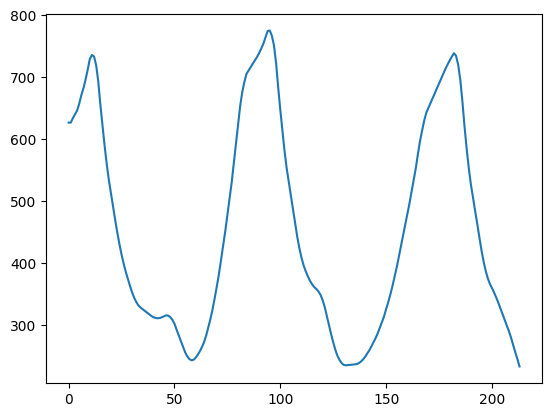

In [7]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [8]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

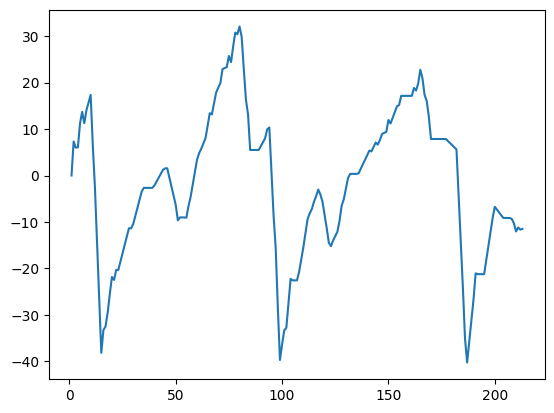

In [9]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [10]:
df_ball_positions['ball_hit']=0

In [12]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)-int(minimum_change_frames_for_hit*1.2 )):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count =0
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0            
            
            if negative_position_change_following_frame and negative_position_change:
                change_count +=1
            elif positive_position_change_following_frame or positive_position_change:
                change_count +=1
        
        if change_count >= minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1
    
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

/tmp/ipykernel_12280/2975662263.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
/tmp/ipykernel_12280/2975662263.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
/tmp/ipykernel_12280/2975662263.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
/tmp/ipykernel_12280/2975662263.py:18: SettingWithCopyWarn

In [14]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,776.865967,717.329407,796.805786,738.392761,727.861084,735.918768,6.522986,1
42,926.624927,306.314594,938.986157,319.178394,312.746494,311.145547,-0.457410,1
46,935.181519,309.623718,951.197205,328.391846,319.007782,315.838551,1.558891,1
58,925.881006,240.970813,939.040503,253.990051,247.480432,243.406350,-1.957913,1
95,624.777222,748.892639,642.158081,766.700195,757.796417,775.404553,0.871826,1
131,716.963684,229.096046,729.237213,242.786385,235.941216,235.241810,-0.557405,1
182,1294.893188,739.124268,1314.162109,760.560242,749.842255,738.732208,5.601685,1
